# Name: Pratyush Upadhyay
### Email ID: iampratyush4@gmail.com
### Github Profile: https://github.com/iampratyush4
### Linkedln Profile: https://www.linkedin.com/in/pratyushupadhyay/

### Data Science and Business Analytics Intern @ THE SPARKS FOUNDATION

#### #GRIPJUNE21

#### Task2: Prediction using Unsupervised ML

### Problem Statement: From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [3]:
# Load the iris dataset.
iryes = pd.read_csv("C:\\Users\\91775\\Downloads\\Iris.csv")
#Return top n (5 by default) rows of a data frame.
iryes.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iryes.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Information about a DataFrame including the index dtype and column dtypes.
iryes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Checking null values
iryes.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Returns a view object
iryes.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# Get a tuple representing the dimension of the Dataform
iryes.shape

(150, 6)

In [9]:
# Returns object containing counts of unique values
iryes["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [10]:
# Describing Statistical summary of data frame.
iryes.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# The optimum number of clusters for K-Means 

In [11]:
# Finding the optimum number of clusters for k-means classification
Iryes = iryes.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    km = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Iryes)
    wcss.append(km.inertia_)

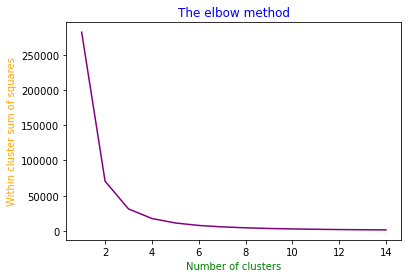

In [16]:
# Determining the value of k using elbow method. Plotting the results onto a line graph & allowing us to observe. 'The elbow'.
plt.plot(range(1, 15), wcss,color='purple')
plt.title('The elbow method',color="blue")
plt.xlabel('Number of clusters',color='green')
plt.ylabel('Within cluster sum of squares',color='orange')
plt.show()

In [17]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_km = km.fit_predict(Iryes)

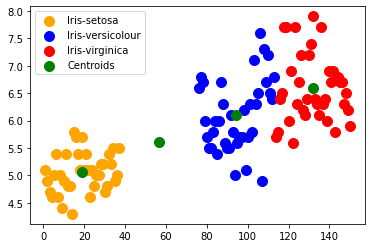

In [24]:
# Visualising the clusters in Scatter Plot using Matplotlib

plt.scatter(Iryes[y_km == 0, 0], Iryes[y_km == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(Iryes[y_km == 1, 0], Iryes[y_km == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(Iryes[y_km == 2, 0], Iryes[y_km == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()

## Conclusion:

### Iris-versicolour-Cluster2 and Iris-virginica-Cluster3 are more accurate in the Scatter Plot.